In [28]:
!pip install seaborn

In [29]:
import pandas as pd

In [30]:
df = pd.read_csv('../data/rapid_aggregate - rapid_aggregate.csv', header=None)

In [31]:
df = df[[0, 1, 2, 7, 9]]
df.columns = ["seleno_type", "tx_id", "anno_classification", "assembly", "anno_source"]
df['anno_classification'].value_counts()

anno_classification
Other             24510
Missannotation    10321
Missing            7584
Well annotated     4352
Name: count, dtype: int64

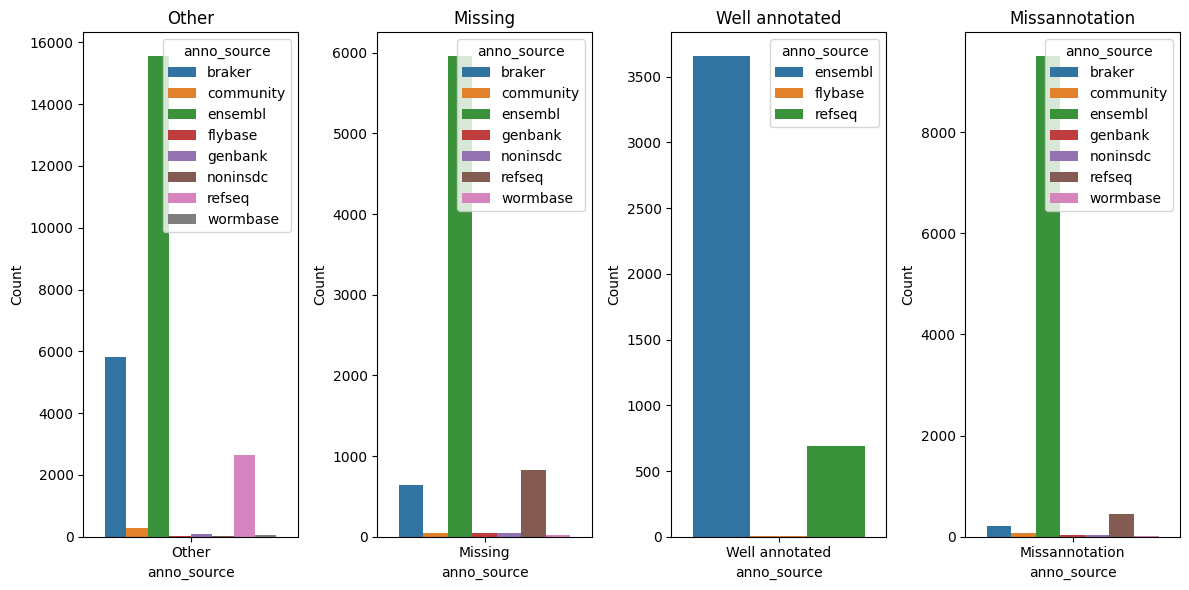

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'anno_source' and 'anno_classification' are columns in 'df'

# Define the order of classifications
classifications_order = ["Other", "Missing", "Well annotated", "Missannotation"]

# Create a DataFrame to store the value counts for each group
value_counts_df = pd.DataFrame(columns=["anno_source", "anno_classification", "count"])

# Iterate over groups and store value counts in the new DataFrame
for name, group in df.groupby("anno_source"):
    value_counts = group["anno_classification"].value_counts().reset_index()
    value_counts.columns = ["anno_classification", "count"]
    value_counts["anno_source"] = name
    value_counts_df = pd.concat([value_counts_df, value_counts])

# Plot all classifications in one panel
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Iterate over classifications and plot for each 'anno_source'
for classification in classifications_order:
    plt.subplot(1, len(classifications_order), classifications_order.index(classification) + 1)
    sns.barplot(
        x="anno_classification",
        y="count",
        hue="anno_source",
        data=value_counts_df[value_counts_df["anno_classification"] == classification],
    )
    plt.title(classification)
    plt.xlabel("anno_source")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

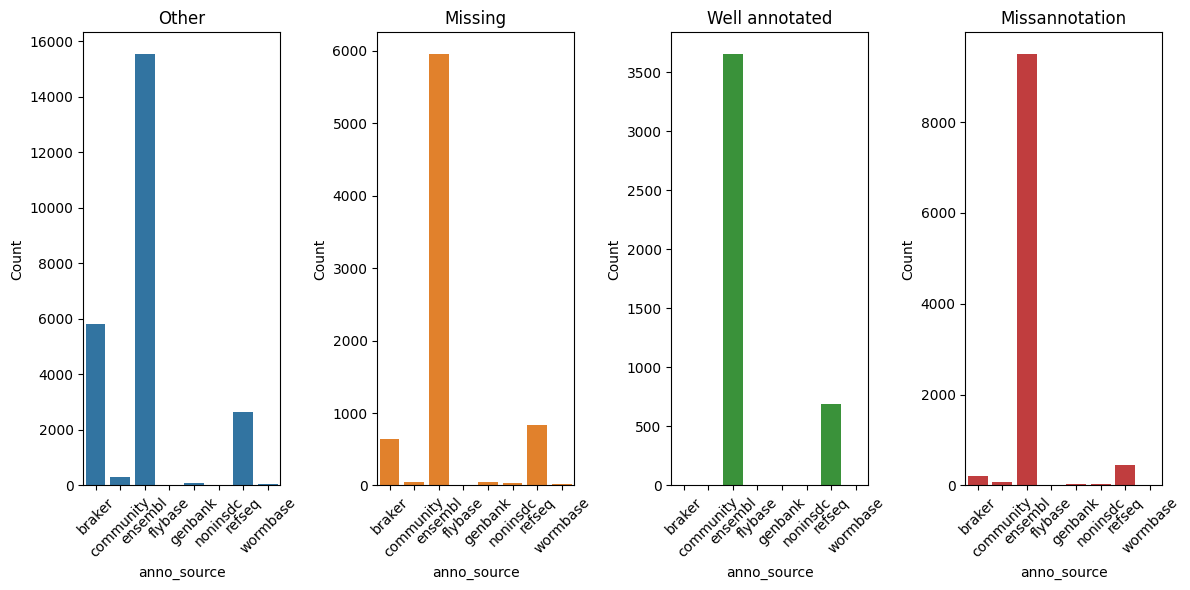

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'anno_source' and 'anno_classification' are columns in 'df'

# Define the order of classifications
classifications_order = ["Other", "Missing", "Well annotated", "Missannotation"]

# Create a pivot table to reshape the data
pivot_table = df.pivot_table(
    index="anno_source",
    columns="anno_classification",
    aggfunc="size",
    fill_value=0,
).reindex(columns=classifications_order)

# Plot all classifications in one panel
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Iterate over classifications and plot for each 'anno_source'
for classification in classifications_order:
    plt.subplot(1, len(classifications_order), classifications_order.index(classification) + 1)
    sns.barplot(
        x=pivot_table.index,
        y=pivot_table[classification],
        color=sns.color_palette()[classifications_order.index(classification)],
    )
    plt.title(classification)
    plt.xlabel("anno_source")
    plt.ylabel("Count")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


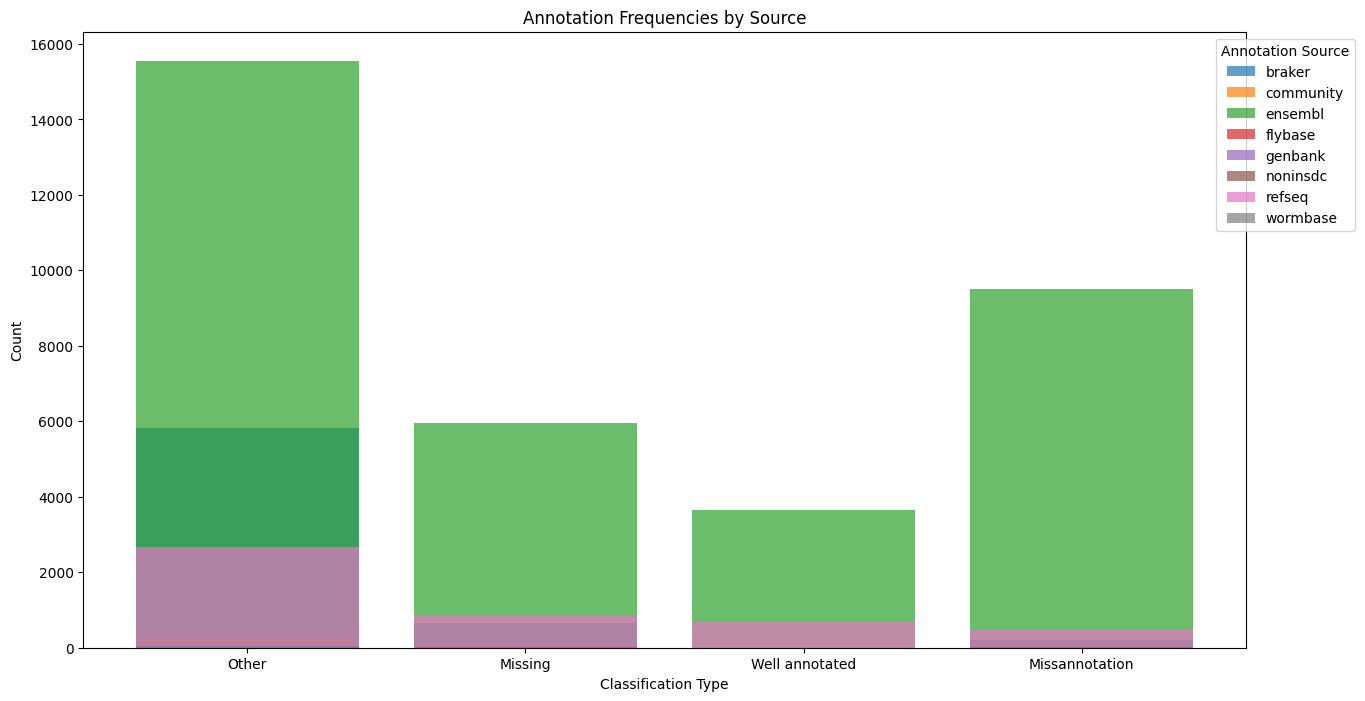

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'anno_source' and 'anno_classification' are columns in 'df'

# Define the order of classifications
classifications_order = ["Other", "Missing", "Well annotated", "Missannotation"]

# Create a pivot table to reshape the data
pivot_table = df.pivot_table(
    index="anno_source",
    columns="anno_classification",
    aggfunc="size",
    fill_value=0,
).reindex(columns=classifications_order)

# Plot one plot per anno_source
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed

# Iterate over 'anno_source' and plot for each one
for anno_source in pivot_table.index:
    plt.bar(
        classifications_order,
        pivot_table.loc[anno_source],
        label=anno_source,
        alpha=0.7,
    )

plt.title("Annotation Frequencies by Source")
plt.xlabel("Classification Type")
plt.ylabel("Count")
plt.legend(title="Annotation Source", loc="upper right", bbox_to_anchor=(1.1, 1))

plt.show()


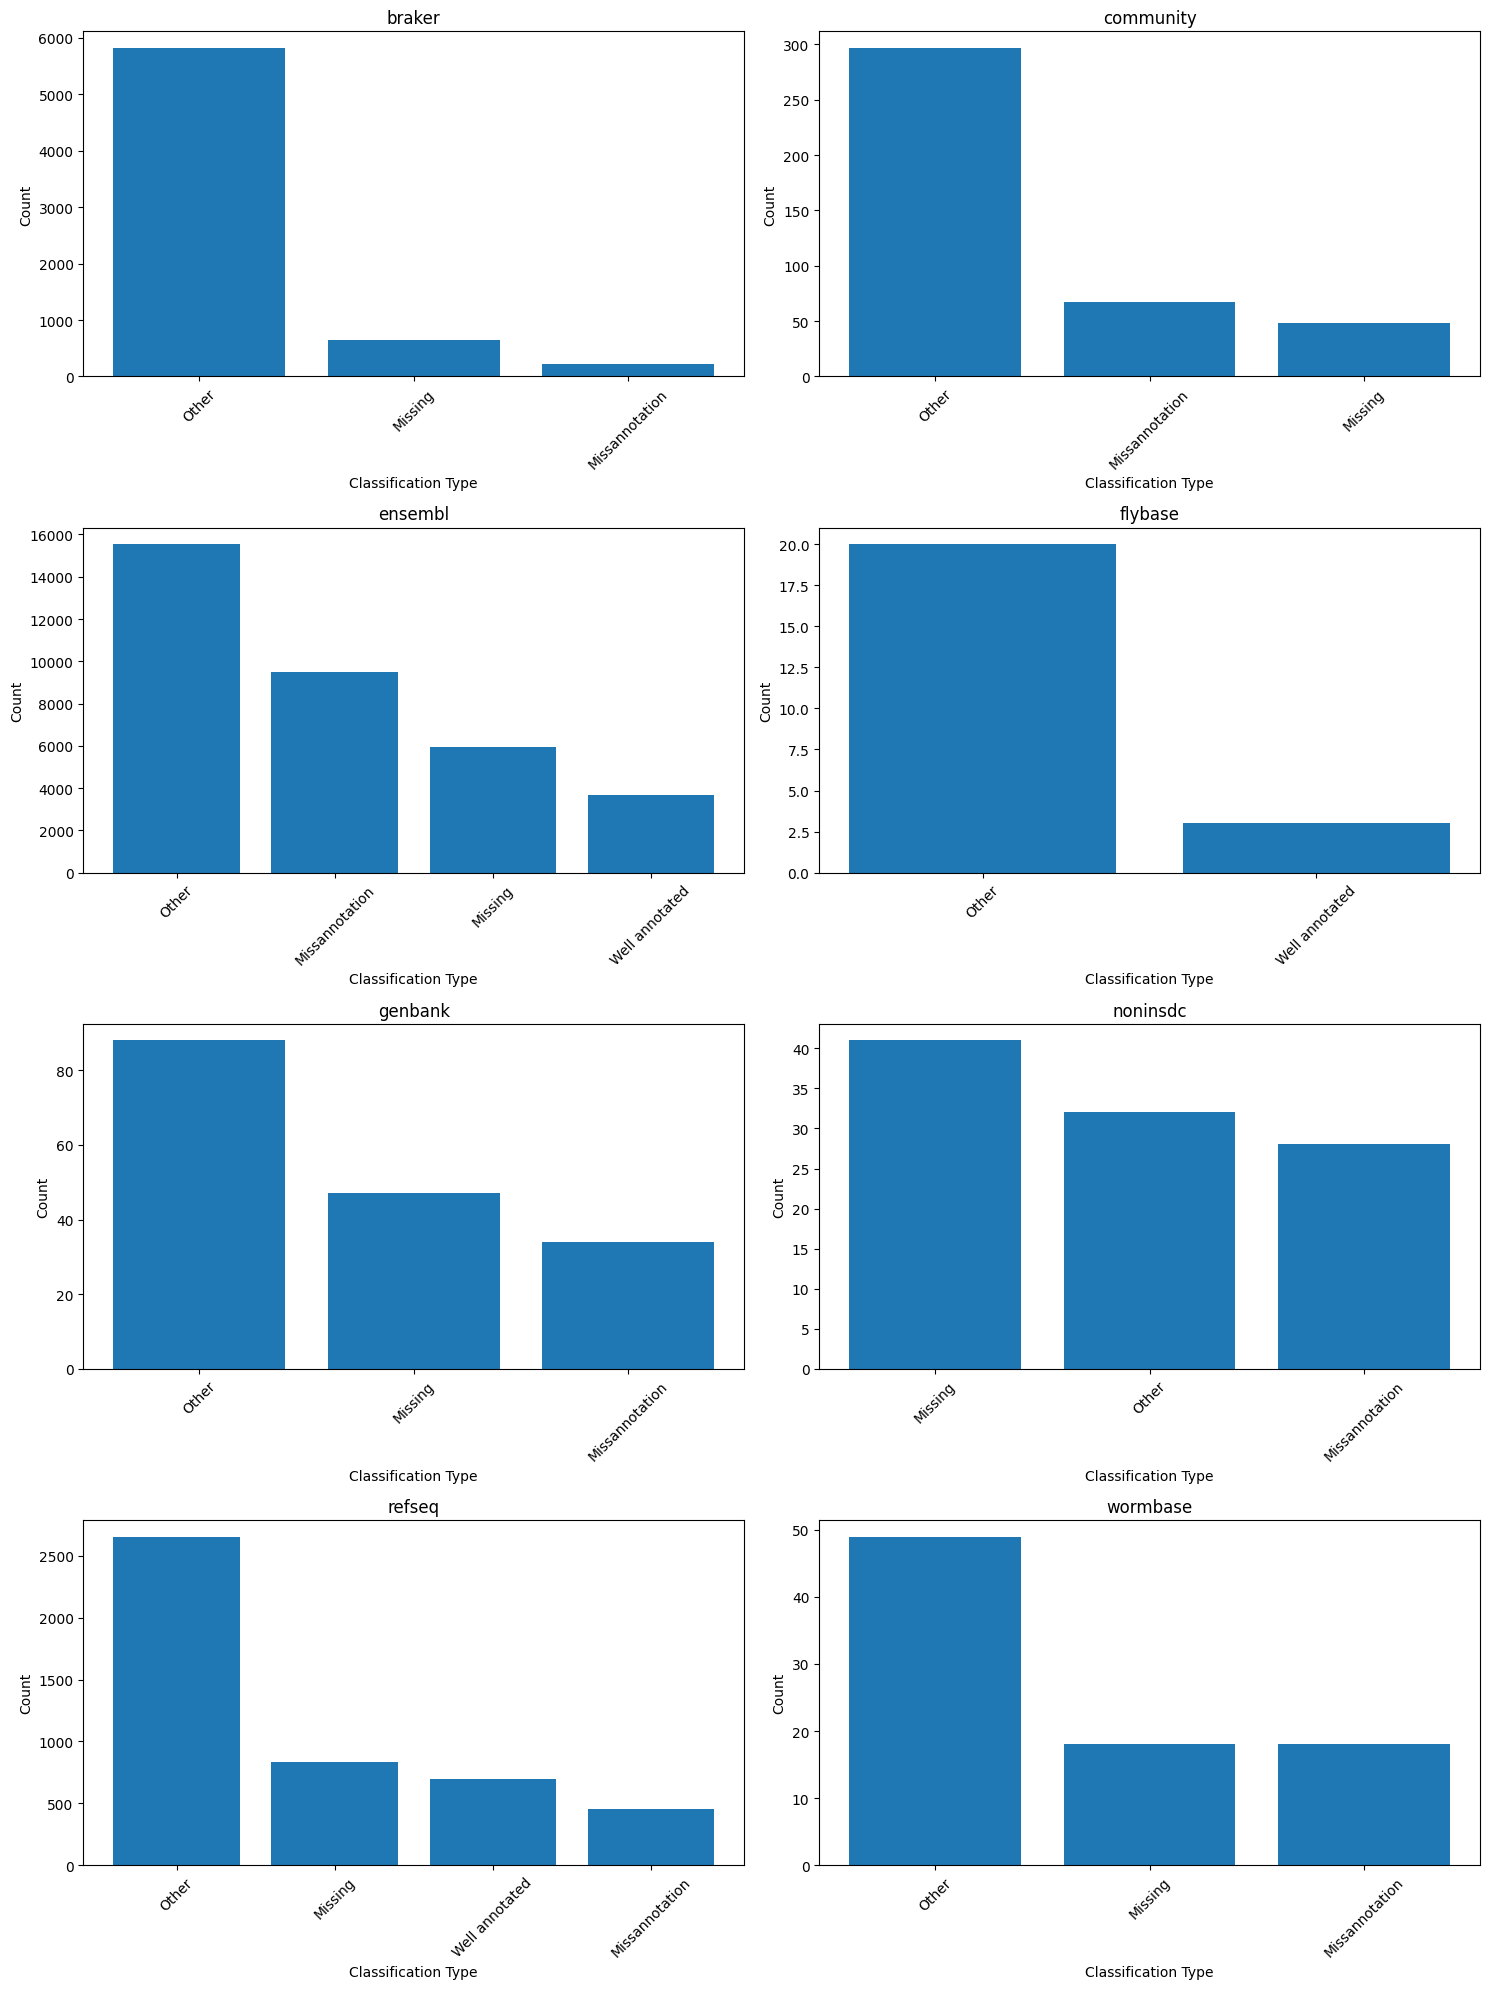

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame and 'anno_source' and 'anno_classification' are columns in 'df'

# Create a DataFrame to store the value counts for each group
value_counts_df = pd.DataFrame(columns=["anno_source", "anno_classification", "count"])

# Iterate over groups and store value counts in the new DataFrame
for name, group in df.groupby("anno_source"):
    value_counts = group["anno_classification"].value_counts().reset_index()
    value_counts.columns = ["anno_classification", "count"]
    value_counts["anno_source"] = name
    value_counts_df = pd.concat([value_counts_df, value_counts])

# Get unique 'anno_source' values
unique_sources = value_counts_df["anno_source"].unique()
num_sources = len(unique_sources)

# Determine the grid size dynamically based on the number of unique sources
grid_size = (int(num_sources / 2) + num_sources % 2, 2)

# Create subplots in a grid
fig, axes = plt.subplots(nrows=grid_size[0], ncols=grid_size[1], figsize=(15, 5 * grid_size[0]))

# Iterate over 'anno_source' and plot for each one in the grid
for i, source in enumerate(unique_sources):
    ax = axes[i // 2, i % 2]
    source_data = value_counts_df[value_counts_df["anno_source"] == source]
    ax.bar(source_data["anno_classification"], source_data["count"])
    ax.set_title(source)
    ax.set_xlabel("Classification Type")
    ax.set_ylabel("Count")
    ax.tick_params(axis="x", rotation=45)  # Rotate X-axis labels

# Adjust layout
plt.tight_layout()

plt.show()


/tmp/ipykernel_1547824/3192974741.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1547824/3192974741.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1547824/3192974741.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ip

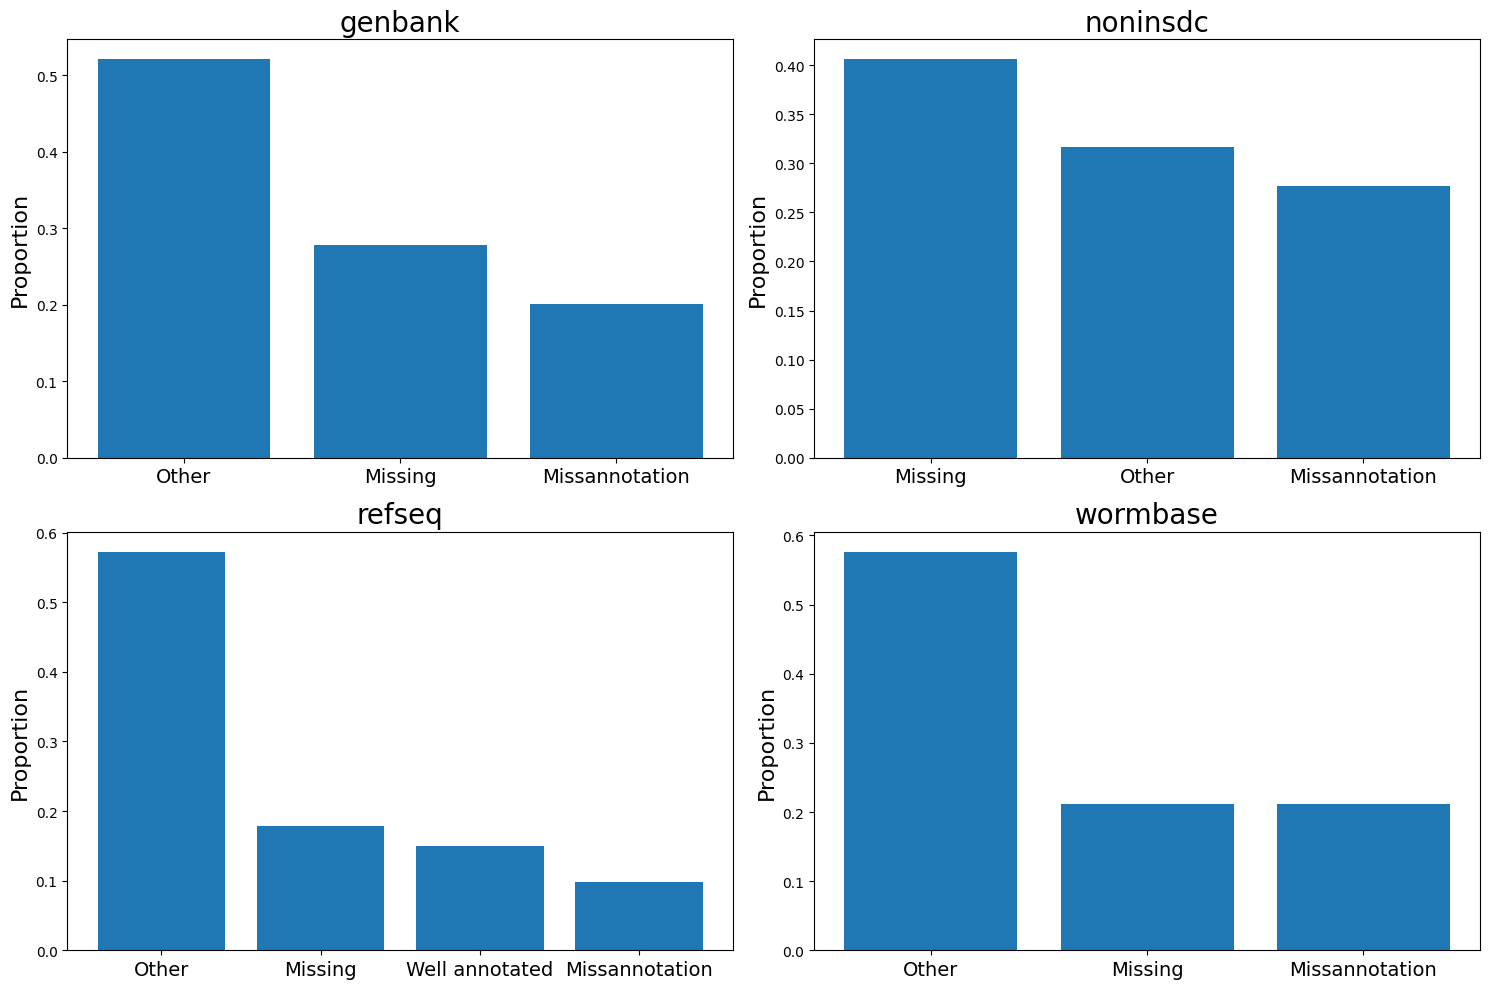

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame and 'anno_source' and 'anno_classification' are columns in 'df'

# Create a DataFrame to store the value counts for each group
value_counts_df = pd.DataFrame(columns=["anno_source", "anno_classification", "count"])

# Iterate over groups and store value counts in the new DataFrame
for name, group in df.groupby("anno_source"):
    value_counts = group["anno_classification"].value_counts().reset_index()
    value_counts.columns = ["anno_classification", "count"]
    value_counts["anno_source"] = name
    value_counts_df = pd.concat([value_counts_df, value_counts])

# Get unique 'anno_source' values
unique_sources = value_counts_df["anno_source"].unique()[len(value_counts_df["anno_source"].unique()) // 2:]
num_sources = len(unique_sources)

# Determine the grid size dynamically based on the number of unique sources
grid_size = (int(num_sources / 2) + num_sources % 2, 2)

# Create subplots in a grid
fig, axes = plt.subplots(nrows=grid_size[0], ncols=grid_size[1], figsize=(15, 5 * grid_size[0]))

# Iterate over 'anno_source' and plot for each one in the grid
for i, source in enumerate(unique_sources):
    ax = axes[i // 2, i % 2]
    source_data = value_counts_df[value_counts_df["anno_source"] == source]
    source_data['proportion'] = source_data['count'] / source_data['count'].sum()

    ax.bar(source_data["anno_classification"], source_data["proportion"])
    ax.set_title(source, fontsize=20)
    ax.set_ylabel("Proportion", fontsize=16)  # Set Y-axis label font size
    ax.tick_params(axis="x", labelsize=14)  # Rotate X-axis labels
    ax.ylim(0, 1)
# Adjust layout
plt.tight_layout()

plt.show()

In [51]:
assessment_df = pd.read_csv("../data/rapid_assessment - rapid_assessment.csv", header=None)[[0, 1, 2, 4, 5]]
assessment_df.columns = ["seleno_type", "tx_id", "anno_classification", "assembly", "anno_source"]
assessment_df.head()

,seleno_type,tx_id,anno_classification,assembly,anno_source
0,DI.1.cysteine,ENSATPT00000019211,Other,GCA_905340225.1,ensembl
1,DI.1.cysteine,ENSATPT00000019210,Other,GCA_905340225.1,ensembl
2,DI.1.cysteine,ENSATPT00000019209,Other,GCA_905340225.1,ensembl
3,GPx.1.cysteine,ENSATPT00000014828,Other,GCA_905340225.1,ensembl
4,GPx.1.cysteine,ENSATPT00000014829,Other,GCA_905340225.1,ensembl


/tmp/ipykernel_1547824/2154698521.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1547824/2154698521.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1547824/2154698521.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ip

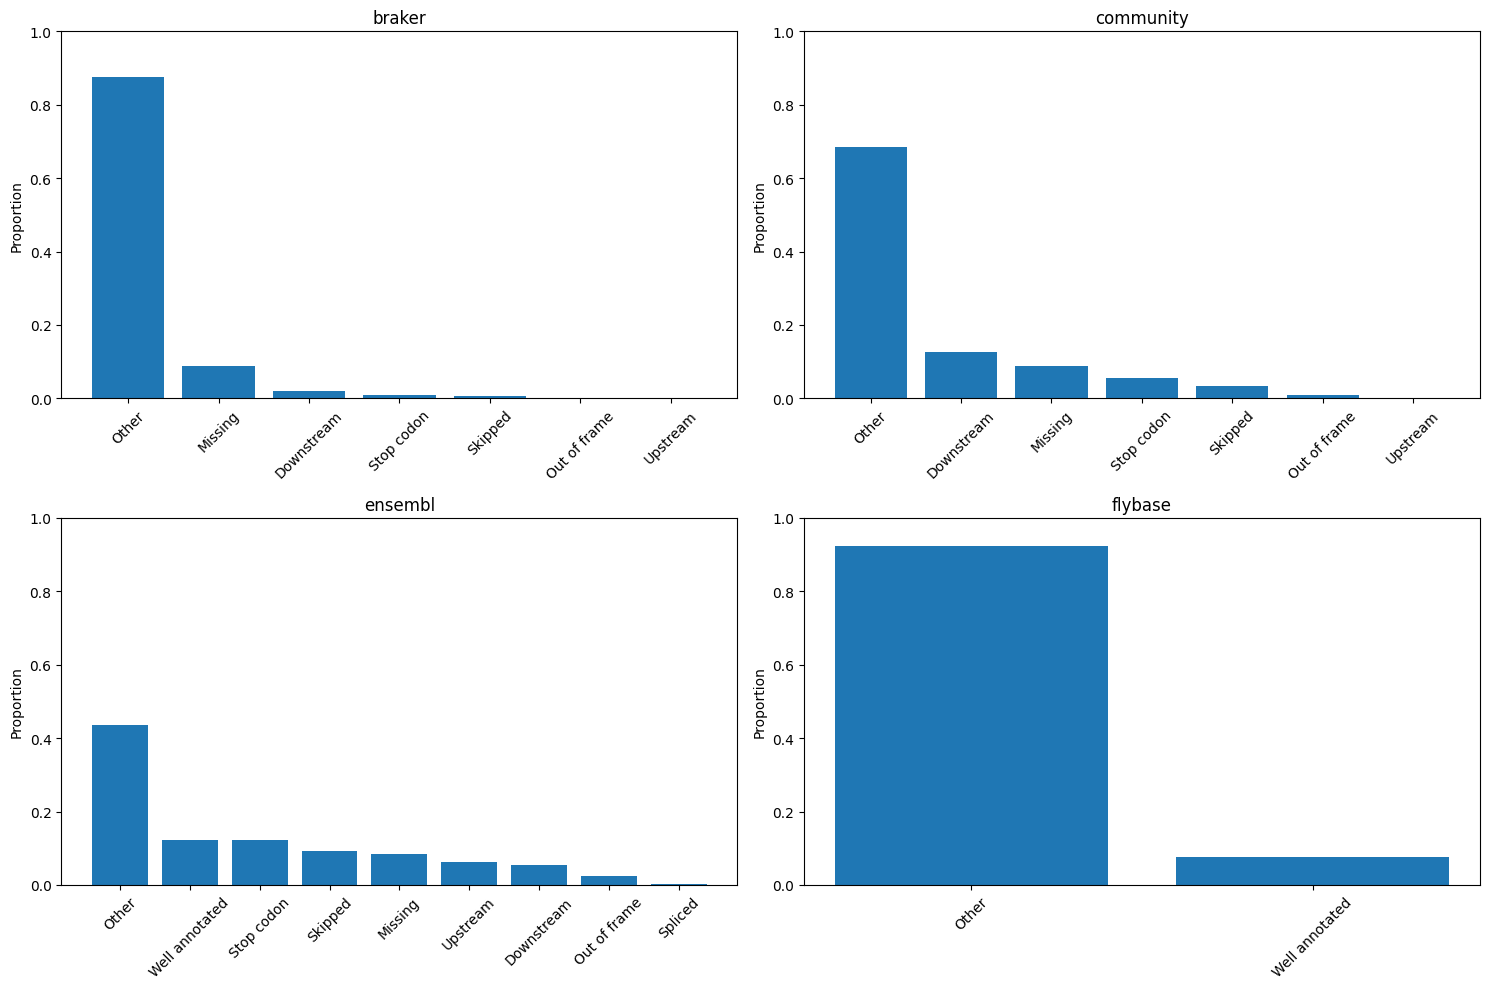

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame and 'anno_source' and 'anno_classification' are columns in 'df'

# Create a DataFrame to store the value counts for each group
value_counts_df = pd.DataFrame(columns=["anno_source", "anno_classification", "count"])

# Iterate over groups and store value counts in the new DataFrame
for name, group in assessment_df.groupby("anno_source"):
    value_counts = group["anno_classification"].value_counts().reset_index()
    value_counts.columns = ["anno_classification", "count"]
    value_counts["anno_source"] = name
    value_counts_df = pd.concat([value_counts_df, value_counts])

# Get unique 'anno_source' values
unique_sources = value_counts_df["anno_source"].unique()[:len(value_counts_df["anno_source"].unique()) // 2]
num_sources = len(unique_sources)

# Determine the grid size dynamically based on the number of unique sources
grid_size = (int(num_sources / 2) + num_sources % 2, 2)

# Create subplots in a grid
fig, axes = plt.subplots(nrows=grid_size[0], ncols=grid_size[1], figsize=(15, 5 * grid_size[0]))

# Iterate over 'anno_source' and plot for each one in the grid
for i, source in enumerate(unique_sources):
    ax = axes[i // 2, i % 2]
    source_data = value_counts_df[value_counts_df["anno_source"] == source]
    source_data['proportion'] = source_data['count'] / source_data['count'].sum()

    ax.bar(source_data["anno_classification"], source_data["proportion"])
    ax.set_title(source)
    ax.set_ylabel("Proportion")
    ax.tick_params(axis="x", rotation=45)  # Rotate X-axis labels
    ax.set_ylim(0, 1)

# Adjust layout
plt.tight_layout()

plt.show()


In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px
color_scale = px.colors.sequential.Viridis

data = dict(
    number=[3707, 2951, 2561, 1766, 100, 0],
    stage=["All Mouse Datasets", "Files Available", "'Controls'", "QC Ran", "QC Passed", "RiboCode"],
    )
fig = px.funnel(data, x='number', y='stage')
fig.show()